<a href="https://colab.research.google.com/github/doommodery/neural/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


Нормализация входных данных

In [3]:
from tensorflow import keras

train_X = trainX / 255
test_X = testX / 255

train_Y = keras.utils.to_categorical(trainy, 10) # Перобразование в OneHot Encoding
test_Y = keras.utils.to_categorical(testy, 10) # Перобразование в OneHot Encoding

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
print(train_Y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1.3. Визуализируем часть данных из датасета

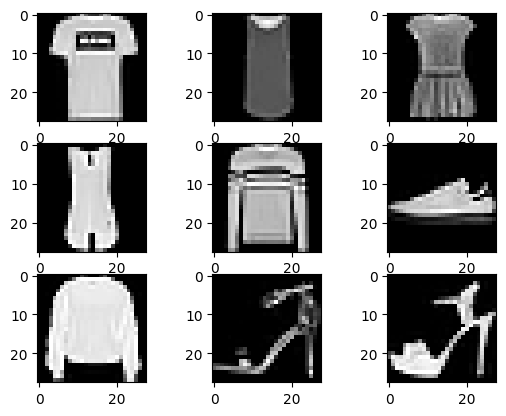

In [5]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [6]:
# Ваш код
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [7]:
# Ваш код
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(train_X, train_Y, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7759 - loss: 0.6220 - val_accuracy: 0.8872 - val_loss: 0.3185
Epoch 2/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8915 - loss: 0.3037 - val_accuracy: 0.9042 - val_loss: 0.2659
Epoch 3/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9135 - loss: 0.2360 - val_accuracy: 0.9115 - val_loss: 0.2446


## 1.6. Анализируем обученную модель. Строим график (графики) обучения

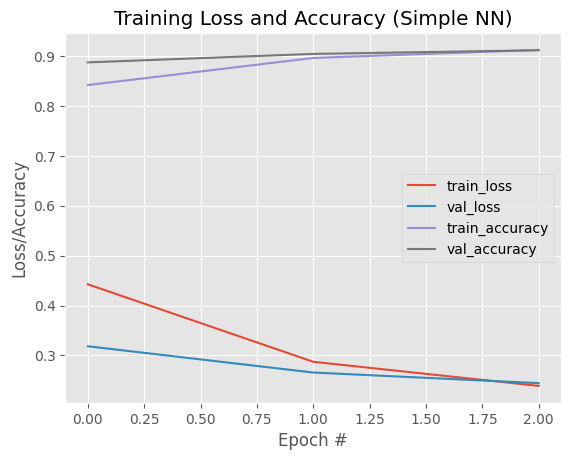

In [8]:
# Ваш код
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [9]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import pickle

model.save('model_fashion.keras')

labels = LabelBinarizer()
labels.fit_transform(train_Y)

with open('labels_fashion', 'wb') as f:
  f.write(pickle.dumps(labels))

print(labels.classes_)

[0 1 2 3 4 5 6 7 8 9]


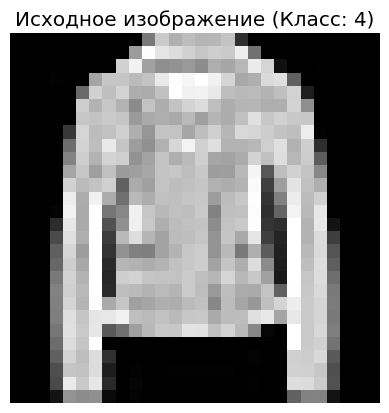

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step

🔍 **Результат предсказания:**
----------------------------------------
Класс          Название            Вероятность
----------------------------------------
0              0                   0.00013
1              1                   0.00002
2              2                   0.04647
3              3                   0.00000
4              4                   0.94417
5              5                   0.00000
6              6                   0.00918
7              7                   0.00000
8              8                   0.00001
9              9                   0.00001
----------------------------------------
🎯 **Лучший прогноз:** 4 (94.42%)


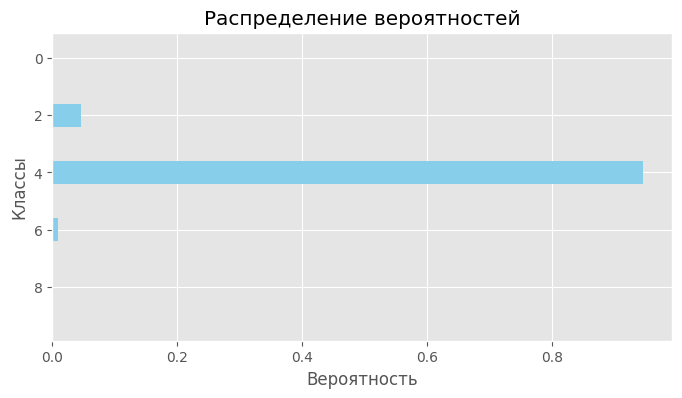

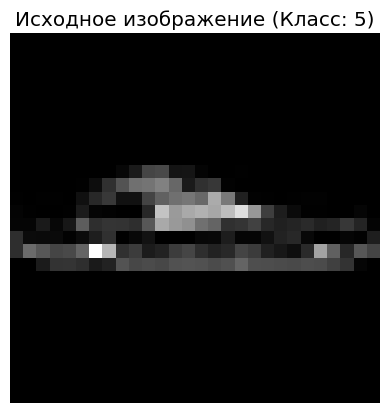

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step

🔍 **Результат предсказания:**
----------------------------------------
Класс          Название            Вероятность
----------------------------------------
0              0                   0.00573
1              1                   0.00006
2              2                   0.00212
3              3                   0.00107
4              4                   0.00045
5              5                   0.96193
6              6                   0.00045
7              7                   0.01761
8              8                   0.00828
9              9                   0.00230
----------------------------------------
🎯 **Лучший прогноз:** 5 (96.19%)


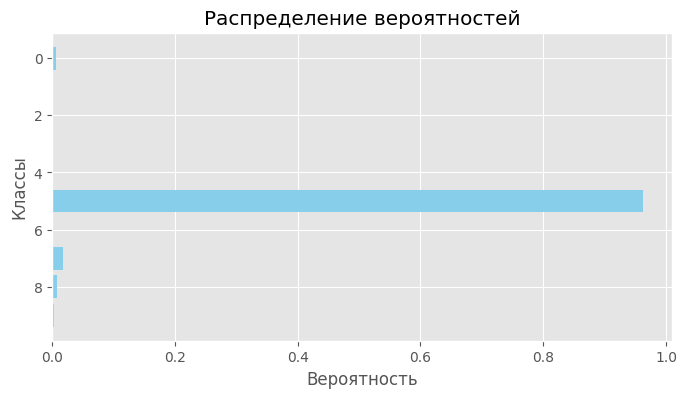

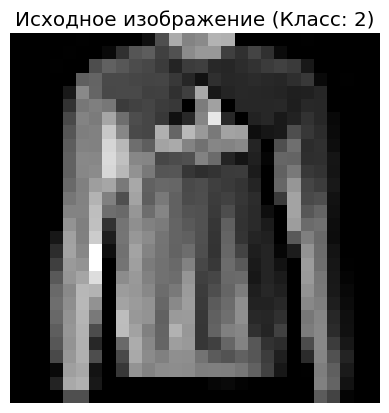

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step

🔍 **Результат предсказания:**
----------------------------------------
Класс          Название            Вероятность
----------------------------------------
0              0                   0.00976
1              1                   0.00002
2              2                   0.89314
3              3                   0.00033
4              4                   0.03499
5              5                   0.00002
6              6                   0.06170
7              7                   0.00000
8              8                   0.00005
9              9                   0.00000
----------------------------------------
🎯 **Лучший прогноз:** 2 (89.31%)


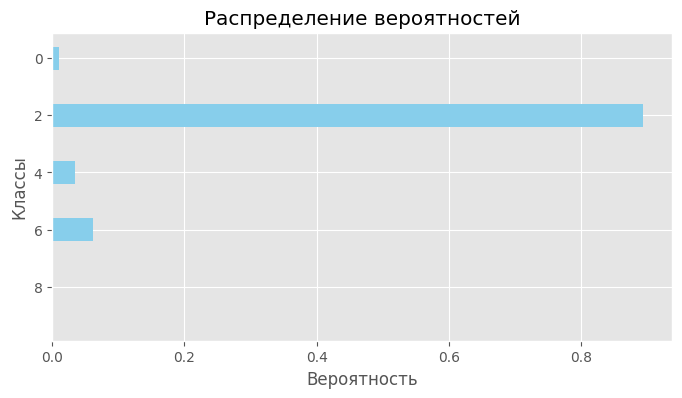

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

def predict_fashion(image, model_path='model_fashion.keras', labels_path='labels_fashion'):
    model = load_model(model_path)
    lb = pickle.loads(open(labels_path, 'rb').read())  # Загружаем лейблы классов

    img = image.reshape(-1, 28, 28, 1)  # Приводим к нужному формату
    preds = model.predict(img)[0]  # Получаем предсказания

    class_names = lb.classes_ if hasattr(lb, "classes_") else [str(i) for i in range(len(preds))]  # Названия классов

    # Выводим предсказания в удобочитаемом виде
    print("\n🔍 **Результат предсказания:**")
    print("-" * 40)
    print(f"{'Класс':<15}{'Название':<20}{'Вероятность'}")
    print("-" * 40)

    for i in range(len(preds)):
        print(f"{i:<15}{class_names[i]:<20}{preds[i]:.5f}")

    best_idx = preds.argmax()
    print("-" * 40)
    print(f"🎯 **Лучший прогноз:** {class_names[best_idx]} ({preds[best_idx]:.2%})")

    # Визуализация предсказаний
    plt.figure(figsize=(8, 4))
    plt.barh(class_names, preds, color='skyblue')
    plt.xlabel("Вероятность")
    plt.ylabel("Классы")
    plt.title("Распределение вероятностей")
    plt.gca().invert_yaxis()
    plt.show()

# --- Тестирование ---
num = np.random.randint(0, 9999, size=3)  # Тестируем 3 случайных примера
for i in range(len(num)):
    plt.imshow(test_X[num[i]], cmap='gray')
    plt.axis('off')
    plt.title(f'Исходное изображение (Класс: {test_Y[num[i]].argmax()})')
    plt.show()

    predict_fashion(test_X[num[i]])  # Вызываем предсказание



# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [11]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
imagesPath = sorted(list(paths.list_images('/content/drive/MyDrive/animals/')))
random.shuffle(imagesPath)

In [14]:
import os
import zipfile
import random
from imutils import paths

# Путь к ZIP-архиву
zip_path = '/content/drive/MyDrive/animals.zip'

# Временная директория для извлечения файлов
extract_path = '/content/animals_extracted'

# Создаем временный каталог, если он не существует
os.makedirs(extract_path, exist_ok=True)

# Словарь для переименования папок
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider"
}

# Открываем ZIP-архив
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Получаем список всех файлов в архиве
    file_list = zip_ref.namelist()

    # Фильтруем файлы, которые находятся в папке raw-img
    raw_img_files = [f for f in file_list if f.startswith('raw-img/') and not f.endswith('/')]

    # Обрабатываем каждый файл
    for file in raw_img_files:
        # Извлекаем имя папки (животного) из пути
        folder_name = file.split('/')[1]  # Например, "cane", "gatto" и т.д.

        # Переименовываем папку, если это необходимо
        if folder_name in translate:
            new_folder_name = translate[folder_name]
        else:
            new_folder_name = folder_name  # Если папка не в словаре, оставляем как есть

        # Создаем папку для животного, если она еще не существует
        animal_folder_path = os.path.join(extract_path, new_folder_name)
        os.makedirs(animal_folder_path, exist_ok=True)

        # Извлекаем файл в соответствующую папку
        zip_ref.extract(file, animal_folder_path)
        print(f"Extracted '{file}' to '{animal_folder_path}'")

# Список для хранения путей к изображениям
imagesPath = []

# Проходим по всем папкам с животными
for animal_folder in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, animal_folder)

    # Получаем список файлов в папке
    files = list(paths.list_images(folder_path))

    # Ограничиваем количество файлов до 200
    if len(files) > 200:
        files = files[:200]

    # Добавляем файлы в общий список
    imagesPath.extend(files)

# Перемешиваем список путей к изображениям
random.shuffle(imagesPath)

# Теперь imagesPath содержит пути к 200 файлам из каждой папки
print(f"Total images: {len(imagesPath)}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Extracted 'raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragn

In [15]:
imagesPath = sorted(list(paths.list_images('/content/animals_extracted/')))
random.shuffle(imagesPath)

In [16]:
def load_images(imagePaths, compression_size=32):
    """
    Функция для загрузки изображений и преобразования их в векторы признаков.

    Args:
        imagePaths: список путей к изображениям.
        compression_size: размер сжатия изображения.

    Returns:
        data: список векторов признаков (сжатых изображений, преобразованных в векторы).
        labels: список меток классов.
    """
    data = []
    labels = []

    for imagePath in imagePaths:
        # Загрузка изображения
        image = cv2.imread(imagePath)
        if image is None:
            print(f"Warning: Unable to load image at {imagePath}")
            continue

        # Изменение разрешения изображения
        image = cv2.resize(image, (compression_size, compression_size))

        # Нормализация изображения
        image = image.astype("float") / 255.0

        # Преобразование изображения в одномерный вектор
        image = image.flatten()

        # Добавление изображения в список
        data.append(image)

        # Извлечение метки класса из пути к изображению
        label = imagePath.split(os.path.sep)[-2]

        # Добавление метки в список
        labels.append(label)

    return data, labels

data, labels = load_images(imagesPath, 64)

In [17]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_test.shape)

(26179, 12288)
(23561, 12288)
(2618, 12288)


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Определение модели
model_my = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Измените на 10 нейронов для 10 классов
])

# Вывод информации о модели
model_my.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
print(Y_train.shape)

(23561, 10)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Reshape

# Flatten the input data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Reshape to (num_samples, 64*64*3)

# Define the model
model_my = Sequential()
model_my.add(Dense(128, activation='relu', input_shape=(64*64*3,)))  # Input shape matches flattened data
model_my.add(Dense(64, activation='relu'))
model_my.add(Dense(10, activation='softmax'))  # Выходной слой для 10x10x10

# Compile the model
model_my.compile(optimizer='adam',
                 loss='categorical_crossentropy',  # Используйте подходящую функцию потерь
                 metrics=['accuracy'])

# Train the model
history = model_my.fit(X_train_flattened, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1885 - loss: 2.2097 - val_accuracy: 0.2236 - val_loss: 2.1138
Epoch 2/3
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2407 - loss: 2.0981 - val_accuracy: 0.2743 - val_loss: 2.0258
Epoch 3/3
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2750 - loss: 2.0130 - val_accuracy: 0.3034 - val_loss: 1.9503


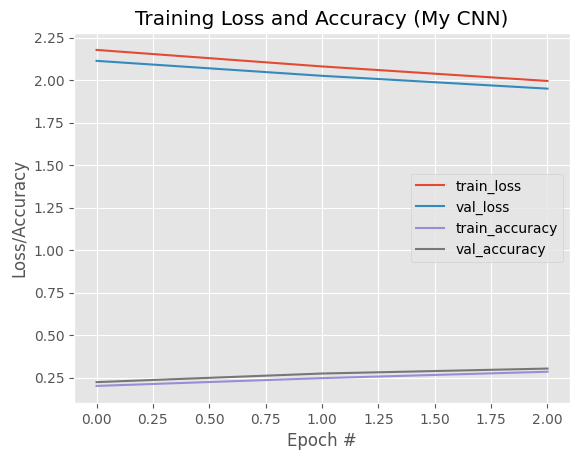

In [21]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [22]:
model_my.save('overfitting_model_my.keras')

Начальные веса, похоже, были очень хорошими и в результате наличия большого количества эпох модель очень сильно переобучилась из-за чего на тренировочной выборке точность достигла порядка 100%, а на валидационной с каждой эпохой падала (и росли потери).

В качестве решения этой проблемы добавлю EarlyStoping, соберу модель и обучу ее заново.

In [23]:
print(Y_train.shape)

(23561, 10)


In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

# Проверка формы X_train
print("Shape of X_train before processing:", X_train.shape)  # Ожидаем (1800, 64, 64, 3)

# Если X_train имеет форму (1800, 12288), преобразуем его в (1800, 64, 64, 3)
if len(X_train.shape) == 2 and X_train.shape[1] == 12288:
    X_train = X_train.reshape(-1, 64, 64, 3)  # Преобразуем в (1800, 64, 64, 3)
    print("Shape of X_train after reshaping:", X_train.shape)

# Проверка формы Y_train перед обработкой
print("Shape of Y_train before processing:", Y_train.shape)  # (1800, 10)

# Преобразуем Y_train в одномерный массив, где каждый элемент представляет класс
Y_train = np.argmax(Y_train, axis=-1)  # Теперь форма (1800,)

# Убеждаемся, что классы находятся в диапазоне [0, 9]
num_classes = 10  # Изменили на 10 классов
Y_train = np.clip(Y_train, 0, num_classes - 1)  # Ограничиваем индексы

# Преобразуем в one-hot encoding
Y_train = to_categorical(Y_train, num_classes=num_classes)  # Теперь (1800, 10)

# Проверка формы после обработки
print("Shape of Y_train after processing:", Y_train.shape)  # Ожидаем (1800, 10)

# Определение модели
model_my = Sequential([
    Input(shape=(64, 64, 3)),  # Определяем входной размер
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Выходной слой для 10 классов
])

# Компиляция модели
model_my.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Определение callback-ов
early_stopping = EarlyStopping(patience=5, verbose=1)
checkpoint = ModelCheckpoint(filepath="best_model_my.keras", monitor="val_accuracy", save_best_only=True, verbose=1)

# Обучение модели
EPOCH = 10  # Убедитесь, что EPOCH определен
history = model_my.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Shape of X_train before processing: (23561, 12288)
Shape of X_train after reshaping: (23561, 64, 64, 3)
Shape of Y_train before processing: (23561, 10)
Shape of Y_train after processing: (23561, 10)
Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1834 - loss: 2.2235
Epoch 1: val_accuracy improved from -inf to 0.19351, saving model to best_model_my.keras
377/377 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.1834 - loss: 2.2235 - val_accuracy: 0.1935 - val_loss: 2.1986
Epoch 2/10
374/377 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1888 - loss: 2.1956
Epoch 2: val_accuracy improved from 0.19351 to 0.24273, saving model to best_model_my.keras
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1890 - loss: 2.1953 - val_accuracy: 0.2427 - val_loss: 2.1091
Epoch 3/10
372/377 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2576 - loss: 2.0805
Epoch 3: val_accuracy improved from 0.24273 to 0.29408, saving model to best_model_my.keras
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 8

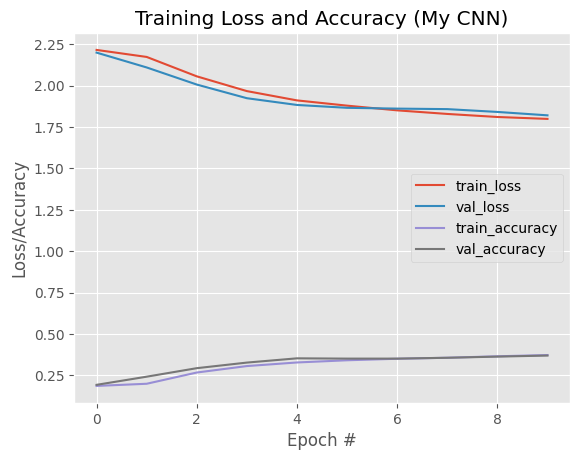

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем массив N с длиной, равной количеству эпох
N = np.arange(0, len(history.history["loss"]))

# Настройка стиля графика
plt.style.use("ggplot")
plt.figure()

# Построение графиков
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")

# Настройка заголовка и подписей
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Отображение графика
plt.show()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [28]:
# Ваш код

model_resnet_like = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_resnet_like.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,337,002 (5.10 MB)

 Trainable params: 1,337,002 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
EPOCH = 20
checkpoint = ModelCheckpoint(filepath="best_model_resnet_like.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_resnet_like.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history_resnet_like = model_resnet_like.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.1764 - loss: 2.2248 - val_accuracy: 0.1842 - val_loss: 2.2035
Epoch 2/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.1843 - loss: 2.2131 - val_accuracy: 0.1935 - val_loss: 2.2010
Epoch 3/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.1797 - loss: 2.2132 - val_accuracy: 0.1842 - val_loss: 2.2007
Epoch 4/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.1875 - loss: 2.2102 - val_accuracy: 0.1842 - val_loss: 2.2001
Epoch 5/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.1863 - loss: 2.2101 - val_accuracy: 0.1842 - val_loss: 2.2009
Epoch 6/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.1850 - loss: 2.2112 - val_accuracy: 0.1935 - val_loss: 2.2017
Epoch 7/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.1825 - loss: 2.2140 - val_accuracy: 0.1842 - val_loss: 2.2006
Epoch 8/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.1880 - loss: 2.2118 - val_a

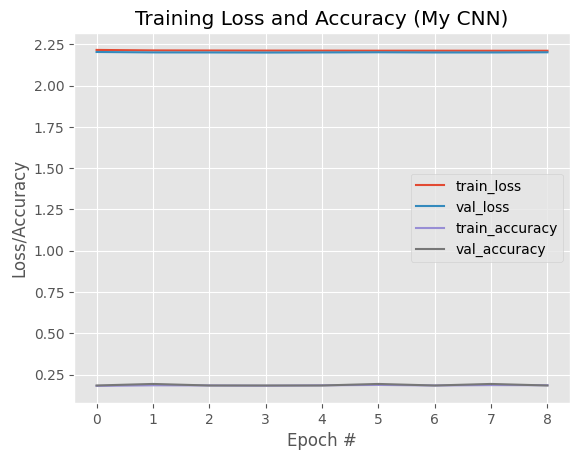

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем массив N с длиной, равной количеству эпох
N = np.arange(0, len(history_resnet_like.history["loss"]))

# Настройка стиля графика
plt.style.use("ggplot")
plt.figure()

# Построение графиков
plt.plot(N, history_resnet_like.history["loss"], label="train_loss")
plt.plot(N, history_resnet_like.history["val_loss"], label="val_loss")
plt.plot(N, history_resnet_like.history["accuracy"], label="train_accuracy")
plt.plot(N, history_resnet_like.history["val_accuracy"], label="val_accuracy")

# Настройка заголовка и подписей
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Отображение графика
plt.show()

## 2.3. Сохраните полученные модели

In [31]:
# сохранены в процессе обучения с помощью чекпоинта

## 2.4. Загрузите обученную модель из прошлой практической работы


In [32]:
# Ваш код
from keras.models import load_model

model_old = load_model('/content/best_model_my.keras')


## 2.5. Сравните между собой точность всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

Model 1 Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,353,888 (24.24 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,235,926 (16.16 MB)


Model 2 Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,353,888 (24.24 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,235,926 (16.16 MB)


Model 3 Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,011,008 (15.30 MB)

 Trainable params: 1,337,002 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,674,006 (10.20 MB)

Processing image: OIP-0PHIc2w-AeE_YXpq9Iya6AHaMZ.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


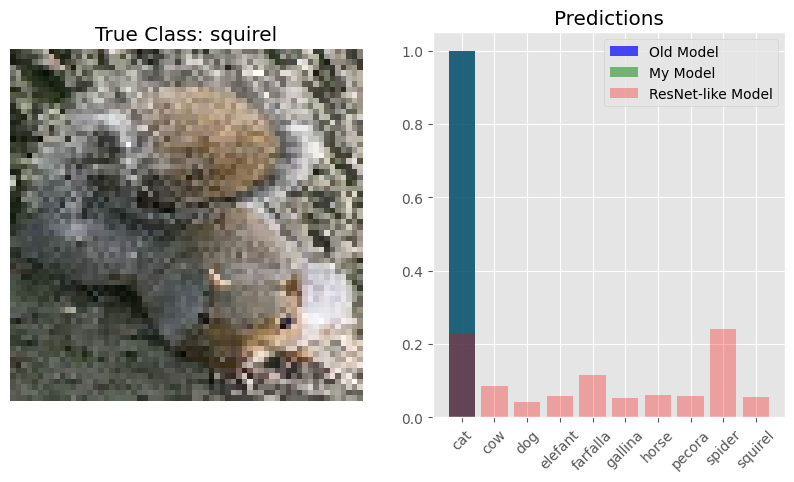

Class	Old_model	My_model	ResNet_like
cat	1.00000		1.00000		0.22915
cow	0.00000		0.00000		0.08686
dog	0.00000		0.00000		0.04338
elefant	0.00000		0.00000		0.05756
farfalla	0.00000		0.00000		0.11554
gallina	0.00000		0.00000		0.05437
horse	0.00000		0.00000		0.06020
pecora	0.00000		0.00000		0.05744
spider	0.00000		0.00000		0.24012
squirel	0.00000		0.00000		0.05538
Result:	cat		cat		spider

Processing image: ea34b10e2df1063ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


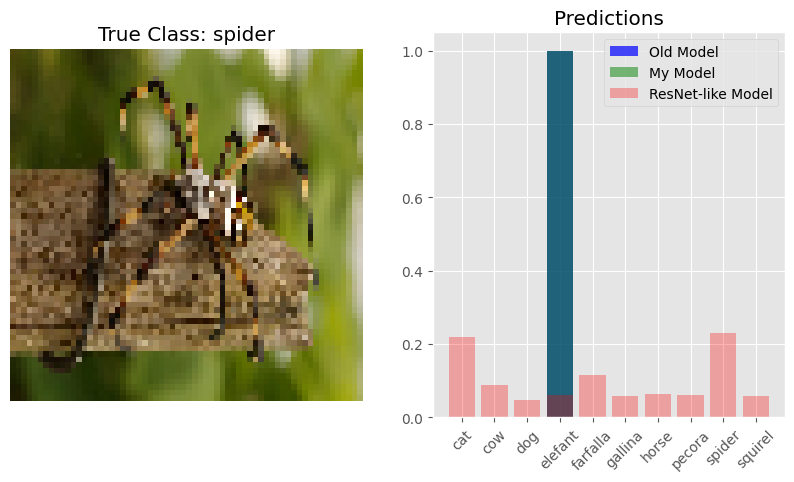

Class	Old_model	My_model	ResNet_like
cat	0.00000		0.00000		0.21961
cow	0.00000		0.00000		0.08868
dog	0.00000		0.00000		0.04633
elefant	1.00000		1.00000		0.06061
farfalla	0.00000		0.00000		0.11594
gallina	0.00000		0.00000		0.05757
horse	0.00000		0.00000		0.06308
pecora	0.00000		0.00000		0.06029
spider	0.00000		0.00000		0.22949
squirel	0.00000		0.00000		0.05840
Result:	elefant		elefant		spider

Processing image: OIP-_82Gy46U8XAWuoXiyps_iwHaE-.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


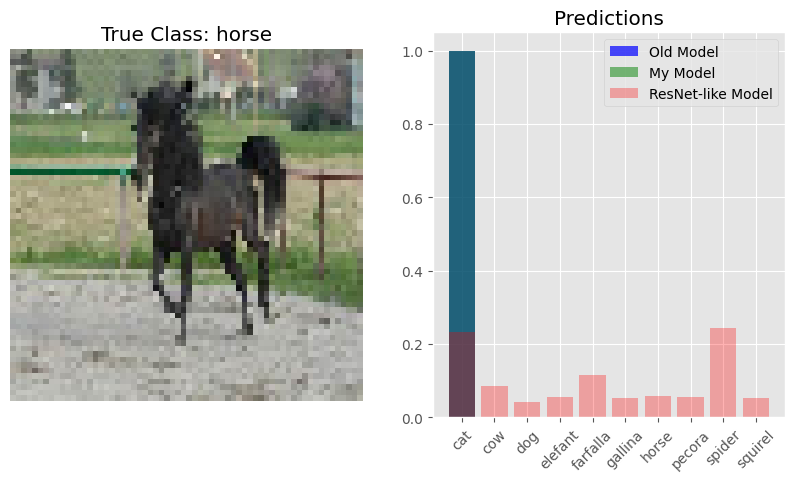

Class	Old_model	My_model	ResNet_like
cat	0.99999		0.99999		0.23303
cow	0.00000		0.00000		0.08602
dog	0.00000		0.00000		0.04196
elefant	0.00001		0.00001		0.05649
farfalla	0.00000		0.00000		0.11505
gallina	0.00000		0.00000		0.05307
horse	0.00000		0.00000		0.05876
pecora	0.00000		0.00000		0.05619
spider	0.00000		0.00000		0.24531
squirel	0.00000		0.00000		0.05413
Result:	cat		cat		spider

Processing image: OIP-0hI_47Tx9Vq-jhfFjyWKQwHaFj.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


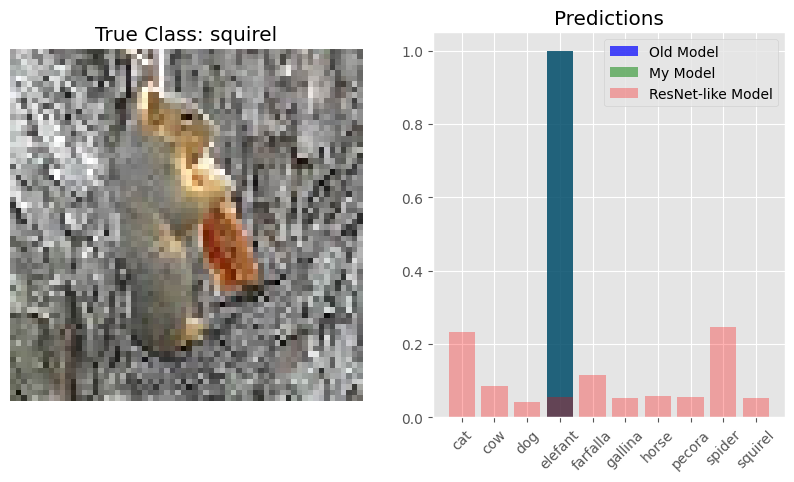

Class	Old_model	My_model	ResNet_like
cat	0.00000		0.00000		0.23377
cow	0.00000		0.00000		0.08584
dog	0.00000		0.00000		0.04185
elefant	1.00000		1.00000		0.05621
farfalla	0.00000		0.00000		0.11512
gallina	0.00000		0.00000		0.05289
horse	0.00000		0.00000		0.05865
pecora	0.00000		0.00000		0.05602
spider	0.00000		0.00000		0.24568
squirel	0.00000		0.00000		0.05398
Result:	elefant		elefant		spider

Processing image: OIP-_6GxeiPFXPS5O4d8C553cwHaE7.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


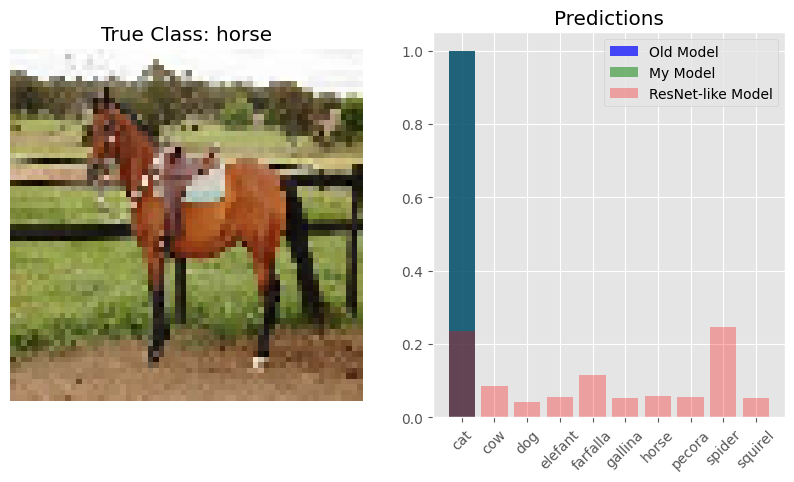

Class	Old_model	My_model	ResNet_like
cat	1.00000		1.00000		0.23470
cow	0.00000		0.00000		0.08564
dog	0.00000		0.00000		0.04148
elefant	0.00000		0.00000		0.05595
farfalla	0.00000		0.00000		0.11502
gallina	0.00000		0.00000		0.05264
horse	0.00000		0.00000		0.05869
pecora	0.00000		0.00000		0.05580
spider	0.00000		0.00000		0.24648
squirel	0.00000		0.00000		0.05359
Result:	cat		cat		spider

Processing image: OIP-_MncrI_hg7qp1G39b6RdOgHaFj.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


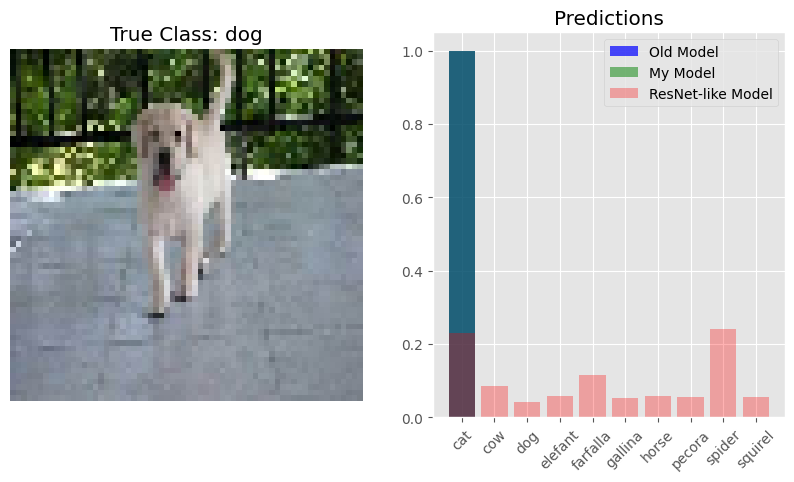

Class	Old_model	My_model	ResNet_like
cat	1.00000		1.00000		0.23031
cow	0.00000		0.00000		0.08655
dog	0.00000		0.00000		0.04284
elefant	0.00000		0.00000		0.05729
farfalla	0.00000		0.00000		0.11540
gallina	0.00000		0.00000		0.05396
horse	0.00000		0.00000		0.05960
pecora	0.00000		0.00000		0.05709
spider	0.00000		0.00000		0.24196
squirel	0.00000		0.00000		0.05499
Result:	cat		cat		spider

Processing image: 43.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


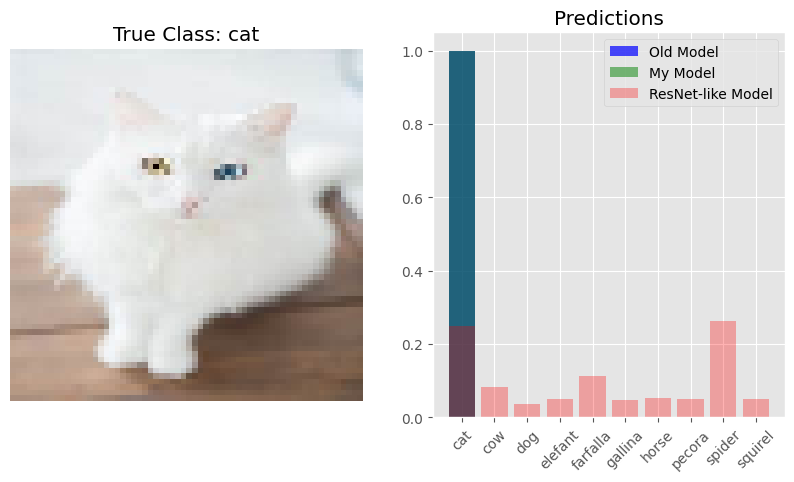

Class	Old_model	My_model	ResNet_like
cat	1.00000		1.00000		0.24887
cow	0.00000		0.00000		0.08225
dog	0.00000		0.00000		0.03716
elefant	0.00000		0.00000		0.05150
farfalla	0.00000		0.00000		0.11378
gallina	0.00000		0.00000		0.04818
horse	0.00000		0.00000		0.05399
pecora	0.00000		0.00000		0.05145
spider	0.00000		0.00000		0.26366
squirel	0.00000		0.00000		0.04917
Result:	cat		cat		spider

Processing image: e833b10920f3013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


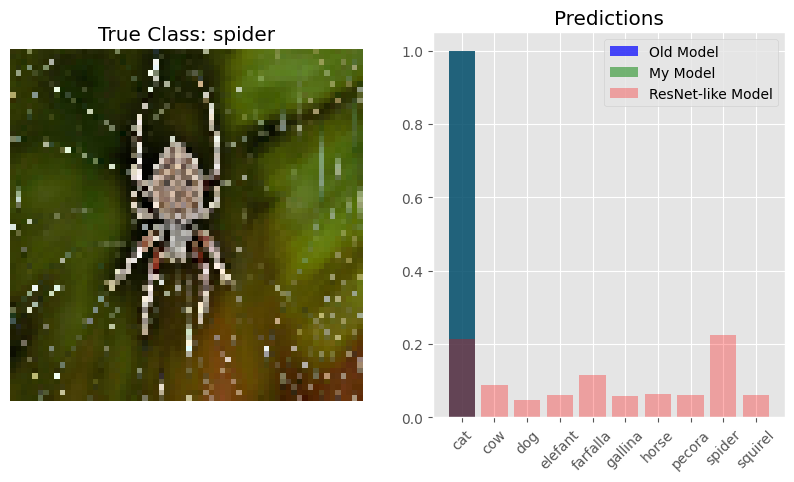

Class	Old_model	My_model	ResNet_like
cat	1.00000		1.00000		0.21497
cow	0.00000		0.00000		0.08956
dog	0.00000		0.00000		0.04780
elefant	0.00000		0.00000		0.06206
farfalla	0.00000		0.00000		0.11607
gallina	0.00000		0.00000		0.05905
horse	0.00000		0.00000		0.06461
pecora	0.00000		0.00000		0.06177
spider	0.00000		0.00000		0.22416
squirel	0.00000		0.00000		0.05996
Result:	cat		cat		spider

Processing image: e833b5092bf0013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


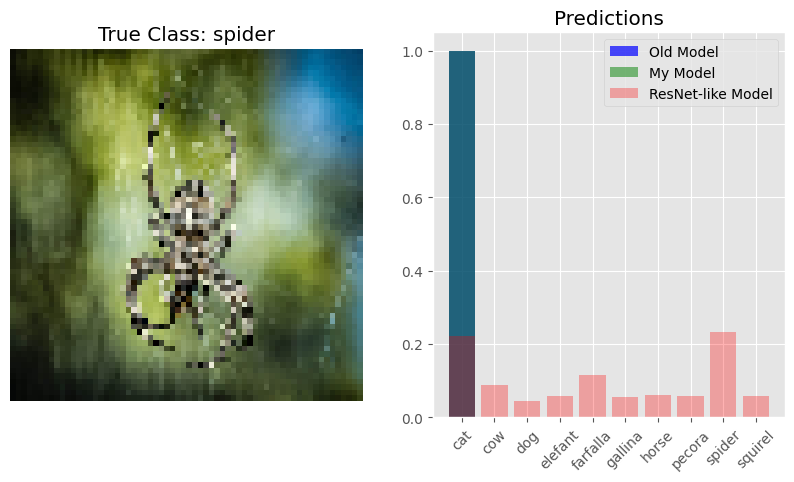

Class	Old_model	My_model	ResNet_like
cat	1.00000		1.00000		0.22230
cow	0.00000		0.00000		0.08810
dog	0.00000		0.00000		0.04549
elefant	0.00000		0.00000		0.05968
farfalla	0.00000		0.00000		0.11572
gallina	0.00000		0.00000		0.05659
horse	0.00000		0.00000		0.06221
pecora	0.00000		0.00000		0.05946
spider	0.00000		0.00000		0.23287
squirel	0.00000		0.00000		0.05758
Result:	cat		cat		spider

Processing image: e835b20b2bf7093ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


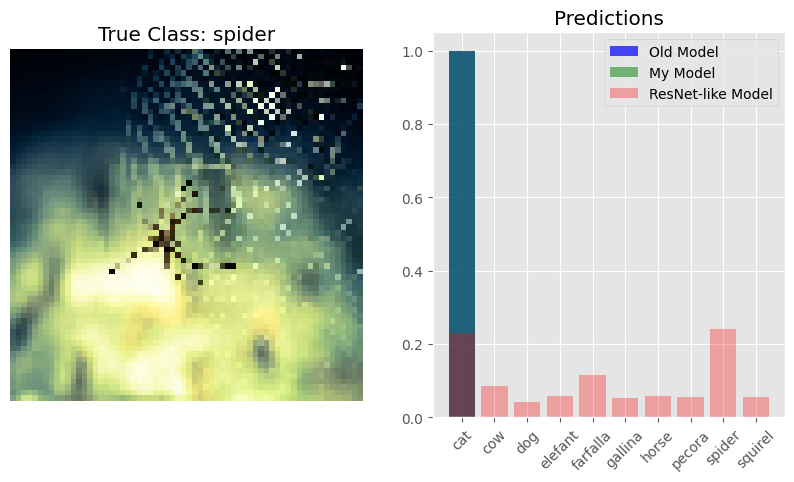

Class	Old_model	My_model	ResNet_like
cat	1.00000		1.00000		0.23012
cow	0.00000		0.00000		0.08664
dog	0.00000		0.00000		0.04280
elefant	0.00000		0.00000		0.05739
farfalla	0.00000		0.00000		0.11524
gallina	0.00000		0.00000		0.05408
horse	0.00000		0.00000		0.05953
pecora	0.00000		0.00000		0.05698
spider	0.00000		0.00000		0.24223
squirel	0.00000		0.00000		0.05499
Result:	cat		cat		spider

Processing image: OIP-_jcAqikxkDv1KOmbCr4J2gHaHr.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


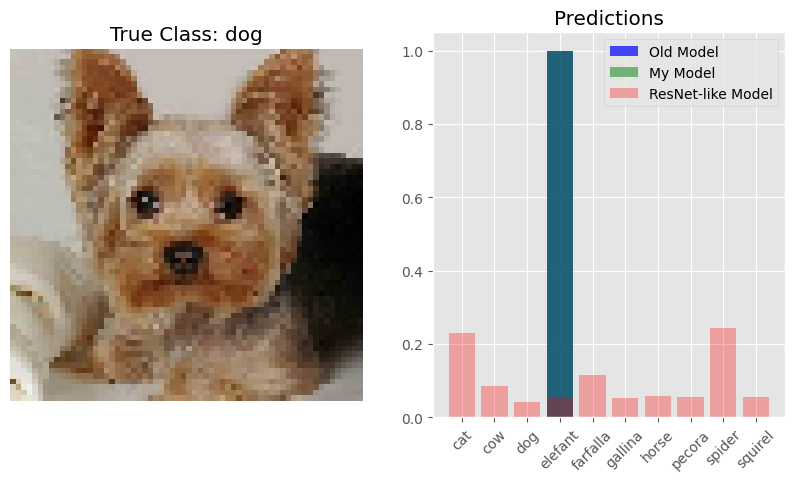

Class	Old_model	My_model	ResNet_like
cat	0.00000		0.00000		0.23158
cow	0.00000		0.00000		0.08620
dog	0.00000		0.00000		0.04230
elefant	1.00000		1.00000		0.05691
farfalla	0.00000		0.00000		0.11525
gallina	0.00000		0.00000		0.05358
horse	0.00000		0.00000		0.05947
pecora	0.00000		0.00000		0.05674
spider	0.00000		0.00000		0.24332
squirel	0.00000		0.00000		0.05464
Result:	elefant		elefant		spider

Processing image: 40.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


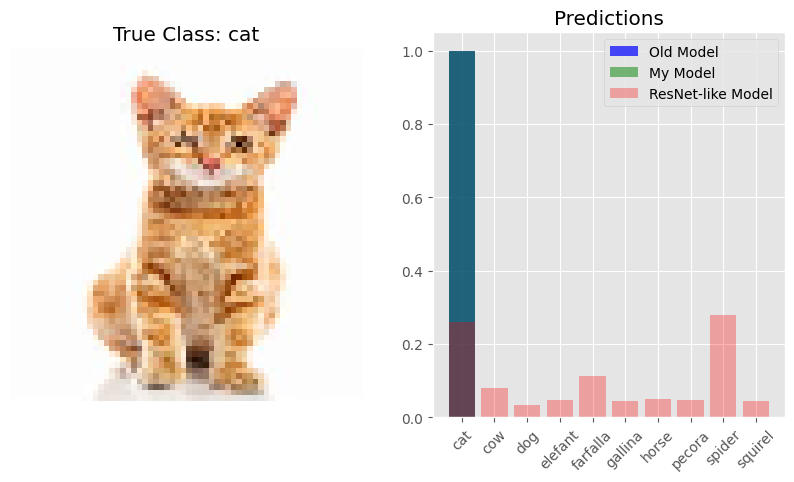

Class	Old_model	My_model	ResNet_like
cat	1.00000		1.00000		0.26094
cow	0.00000		0.00000		0.07927
dog	0.00000		0.00000		0.03366
elefant	0.00000		0.00000		0.04783
farfalla	0.00000		0.00000		0.11205
gallina	0.00000		0.00000		0.04437
horse	0.00000		0.00000		0.05017
pecora	0.00000		0.00000		0.04783
spider	0.00000		0.00000		0.27842
squirel	0.00000		0.00000		0.04546
Result:	cat		cat		spider

Processing image: 51.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


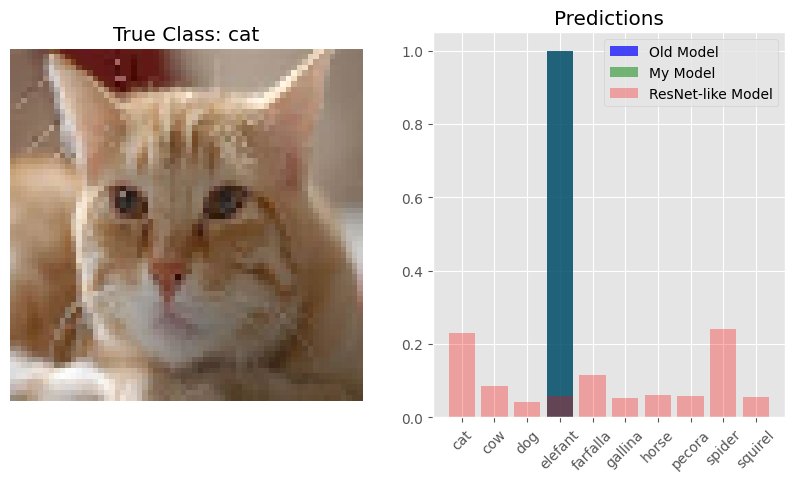

Class	Old_model	My_model	ResNet_like
cat	0.00000		0.00000		0.22908
cow	0.00000		0.00000		0.08689
dog	0.00000		0.00000		0.04329
elefant	1.00000		1.00000		0.05773
farfalla	0.00000		0.00000		0.11533
gallina	0.00000		0.00000		0.05433
horse	0.00000		0.00000		0.06014
pecora	0.00000		0.00000		0.05746
spider	0.00000		0.00000		0.24033
squirel	0.00000		0.00000		0.05542
Result:	elefant		elefant		spider

Processing image: OIP-_uaKmPDWs8AUpOvHYdaMiwHaLH.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


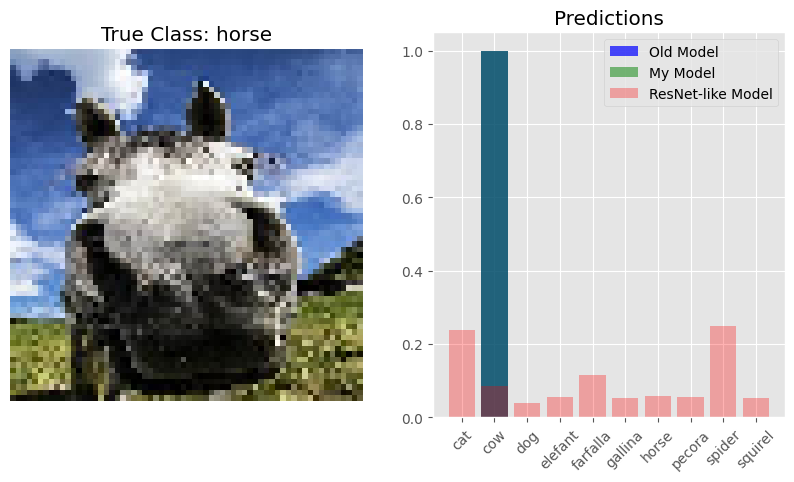

Class	Old_model	My_model	ResNet_like
cat	0.00002		0.00002		0.23774
cow	0.99998		0.99998		0.08473
dog	0.00000		0.00000		0.04056
elefant	0.00000		0.00000		0.05491
farfalla	0.00000		0.00000		0.11465
gallina	0.00000		0.00000		0.05175
horse	0.00000		0.00000		0.05761
pecora	0.00000		0.00000		0.05482
spider	0.00000		0.00000		0.25050
squirel	0.00000		0.00000		0.05274
Result:	cow		cow		spider

Processing image: OIP-_3S-iEDMQnko7ZHgq_FTcwHaEL.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


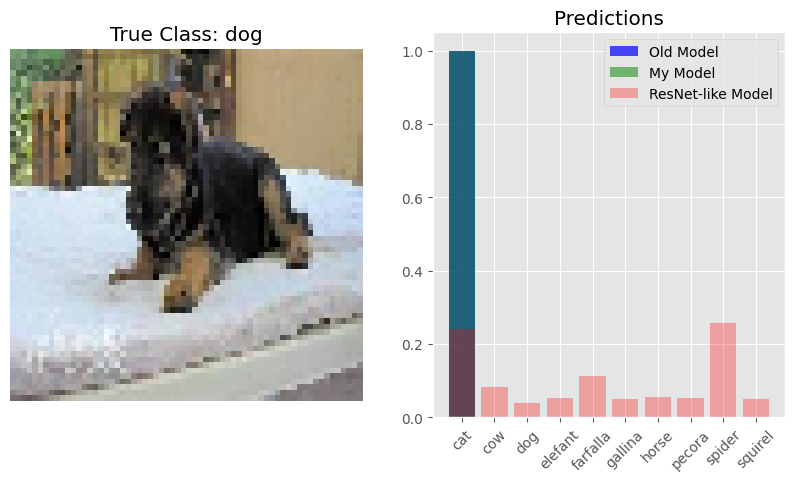

Class	Old_model	My_model	ResNet_like
cat	1.00000		1.00000		0.24255
cow	0.00000		0.00000		0.08391
dog	0.00000		0.00000		0.03900
elefant	0.00000		0.00000		0.05355
farfalla	0.00000		0.00000		0.11403
gallina	0.00000		0.00000		0.05006
horse	0.00000		0.00000		0.05576
pecora	0.00000		0.00000		0.05318
spider	0.00000		0.00000		0.25694
squirel	0.00000		0.00000		0.05101
Result:	cat		cat		spider


Final Accuracy:
Old Model Accuracy: 13.33%
My Model Accuracy: 13.33%
ResNet-like Model Accuracy: 26.67%


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from imutils import paths
import random
import os

# Загрузка моделей
model_1 = load_model('/content/best_model_my.keras')  # Модель 1
model_2 = load_model('/content/best_model_my.keras')  # Модель 2
model_3 = load_model('/content/best_model_resnet_like.keras')  # Модель 3

# Проверка архитектуры моделей
print("Model 1 Summary:")
model_1.summary()

print("\nModel 2 Summary:")
model_2.summary()

print("\nModel 3 Summary:")
model_3.summary()

# Функция для загрузки и подготовки изображений
def load_and_prepare_image(image_path, target_size=(64, 64)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Нормализация
    return img_array

# Функция для предсказания
def predict_image(img_array, model):
    img_input = img_array.reshape((1, 64, 64, 3))
    preds = model.predict(img_input)[0]
    return preds

# Путь к директории с изображениями
imagesPath = sorted(list(paths.list_images('/content/drive/MyDrive/animals/')))
random.shuffle(imagesPath)  # Перемешиваем изображения

# Автоматическое создание списка классов из структуры директорий
class_labels = sorted(os.listdir('/content/drive/MyDrive/animals/'))

# Ограничиваемся 15 изображениями
images_to_test = imagesPath[:15]

# Сравнение моделей
results = {
    'model_1_correct': 0,
    'model_2_correct': 0,
    'model_3_correct': 0,
}

# Обработка изображений
for img_path in images_to_test:
    print(f"Processing image: {os.path.basename(img_path)}")
    img_array = load_and_prepare_image(img_path)

    # Получаем истинный класс из пути
    true_class = os.path.basename(os.path.dirname(img_path))  # Например, 'cat', 'dog' и т.д.

    # Пропускаем изображения с неизвестными классами
    if true_class not in class_labels:
        print(f"Skipping image {os.path.basename(img_path)}: unknown class '{true_class}'")
        continue

    true_class_idx = class_labels.index(true_class)  # Индекс истинного класса

    # Предсказания моделей
    preds_1 = predict_image(img_array, model_1)
    preds_2 = predict_image(img_array, model_2)
    preds_3 = predict_image(img_array, model_3)

    # Сравнение предсказаний с истинным классом
    if np.argmax(preds_1) == true_class_idx:
        results['model_1_correct'] += 1
    if np.argmax(preds_2) == true_class_idx:
        results['model_2_correct'] += 1
    if np.argmax(preds_3) == true_class_idx:
        results['model_3_correct'] += 1

    # Визуализация результатов для текущего изображения
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"True Class: {true_class}")

    plt.subplot(1, 2, 2)
    # Используем только первые 4 класса для гистограммы
    plt.bar(class_labels[:10], preds_1, color='blue', alpha=0.7, label='Old Model')
    plt.bar(class_labels[:10], preds_2, color='green', alpha=0.5, label='My Model')
    plt.bar(class_labels[:10], preds_3, color='red', alpha=0.3, label='ResNet-like Model')
    plt.xticks(rotation=45)
    plt.title("Predictions")
    plt.legend()
    plt.show()

    # Вывод предсказаний
    print('Class\tOld_model\tMy_model\tResNet_like')
    for i in range(len(preds_1)):
        print(f'{class_labels[i]}\t{preds_1[i]:.5f}\t\t{preds_2[i]:.5f}\t\t{preds_3[i]:.5f}')
    print(f'Result:\t{class_labels[np.argmax(preds_1)]}\t\t{class_labels[np.argmax(preds_2)]}\t\t{class_labels[np.argmax(preds_3)]}\n')

# Вывод итоговой точности
total_images = len(images_to_test)
print("\nFinal Accuracy:")
print(f"Old Model Accuracy: {results['model_1_correct'] / total_images * 100:.2f}%")
print(f"My Model Accuracy: {results['model_2_correct'] / total_images * 100:.2f}%")
print(f"ResNet-like Model Accuracy: {results['model_3_correct'] / total_images * 100:.2f}%")

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [ ]:
train.shape

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

### 3.1.2. Отрисуйте несколько примеров

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

Вот один пример обучающей пары.

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
# Ваш код здесь
model_rec = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(2048, activation='sigmoid'),
])

model_rec.summary()

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
# Ваш код здесь
model_rec.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь
EPOCH = 100

checkpoint = ModelCheckpoint(filepath="best_model_rec.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

history_rec = model_rec.fit(X_train, y_train_n, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь
preds = model_rec.predict(X_test, batch_size=10)

## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test_n)

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
preds.shape

In [ ]:
# Ваш код здесь
pred_test = preds.reshape(preds.shape[0], 32, 64)

Отрисуйте все предсказания.

In [ ]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='pred faces')
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )